<a href="https://colab.research.google.com/github/IshaanKetchup/ML-tools-and-techniques/blob/main/Q%20Learning%20Tic%20Tac%20Toe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Initialize the Q-table
Q = {}

# Define the Tic-Tac-Toe board
def initialize_board():
    return np.zeros((3, 3), dtype=int)

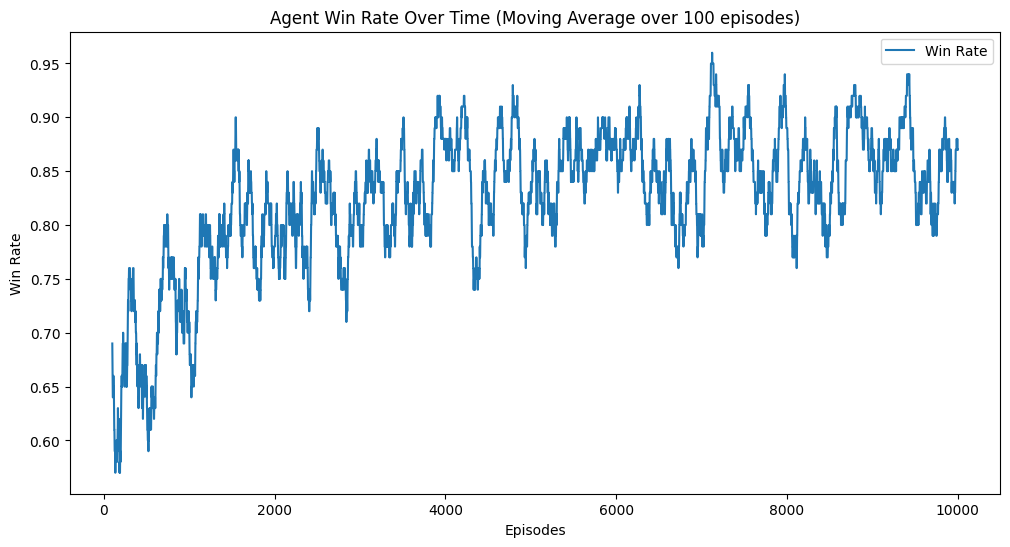

In [2]:
# Check for a win
def check_win(board, player):
    for i in range(3):
        if np.all(board[i, :] == player) or np.all(board[:, i] == player):
            return True
    if board[0, 0] == board[1, 1] == board[2, 2] == player or board[0, 2] == board[1, 1] == board[2, 0] == player:
        return True
    return False

# Check for a draw
def check_draw(board):
    return not np.any(board == 0)

# Get available actions
def get_available_actions(board):
    return [(i, j) for i in range(3) for j in range(3) if board[i, j] == 0]

# Choose an action using epsilon-greedy policy
def choose_action(state, board, epsilon):
    if random.uniform(0, 1) < epsilon:
        return random.choice(get_available_actions(board))
    else:
        if state in Q and Q[state]:
            # Choose the action with the maximum Q-value
            return max(Q[state], key=Q[state].get)
        else:
            # No action in Q-table, choose random
            return random.choice(get_available_actions(board))

# Update Q-value
def update_q_value(state, action, reward, next_state, alpha, gamma):
    max_future_q = max(Q.get(next_state, {}).values(), default=0)
    current_q = Q.get(state, {}).get(action, 0)
    new_q = current_q + alpha * (reward + gamma * max_future_q - current_q)
    if state not in Q:
        Q[state] = {}
    Q[state][action] = new_q

# Convert board to a tuple (hashable type)
def board_to_tuple(board):
    return tuple(map(tuple, board))

# Train the agent
def train(episodes, alpha=0.1, gamma=0.9, epsilon=0.1):
    win_history = []
    for episode in range(episodes):
        board = initialize_board()
        state = board_to_tuple(board)
        done = False
        result = None  # Initialize result
        while not done:
            action = choose_action(state, board, epsilon)
            board[action[0], action[1]] = 1
            next_state = board_to_tuple(board)
            if check_win(board, 1):
                update_q_value(state, action, 1, next_state, alpha, gamma)
                result = 1  # Agent won
                done = True
            elif check_draw(board):
                update_q_value(state, action, 0.5, next_state, alpha, gamma)
                result = 0  # Draw
                done = True
            else:
                opponent_action = random.choice(get_available_actions(board))
                board[opponent_action[0], opponent_action[1]] = -1
                next_state = board_to_tuple(board)
                if check_win(board, -1):
                    update_q_value(state, action, -1, next_state, alpha, gamma)
                    result = -1  # Agent lost
                    done = True
                elif check_draw(board):
                    update_q_value(state, action, 0.5, next_state, alpha, gamma)
                    result = 0  # Draw
                    done = True
                else:
                    update_q_value(state, action, 0, next_state, alpha, gamma)
            state = next_state
        # Record the result
        if result == 1:
            win_history.append(1)
        else:
            win_history.append(0)
    return win_history

# Train the agent for 10000 episodes
win_history = train(10000)

# Calculate the moving average of win rate
def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size), 'valid') / window_size

# Set the window size for the moving average
window_size = 100

# Compute the moving average
win_rate = moving_average(win_history, window_size)

# Generate episodes for plotting
episodes = np.arange(window_size, len(win_history) + 1)

# Plot the win rate over time
plt.figure(figsize=(12,6))
plt.plot(episodes, win_rate, label='Win Rate')
plt.xlabel('Episodes')
plt.ylabel('Win Rate')
plt.title('Agent Win Rate Over Time (Moving Average over {} episodes)'.format(window_size))
plt.legend()
plt.show()

This graph shows how your reinforcement learning agent's win rate evolves over time during training on the game of tic-tac-toe. Here’s what’s going on:

X-axis: Episodes
Each point represents a point in training — how many games (episodes) the agent has played so far.

Goes from 0 to 10,000, meaning the agent was trained over 10,000 games.

Y-axis: Win Rate
This is the moving average win rate over the last 100 games.

A value of 1.0 means the agent won 100 out of the last 100 games; 0.0 means zero wins.



In [3]:
def print_board(board):
    symbols = {1: 'X', -1: 'O', 0: ' '}
    for row in board:
        print('|'.join([symbols[cell] for cell in row]))
        print('-' * 5)

def human_move(board):
    while True:
        try:
            move = input("Enter your move as row,col (0-based, e.g., 1,2): ")
            row, col = map(int, move.split(','))
            if board[row, col] == 0:
                return (row, col)
            else:
                print("Cell is already taken. Try again.")
        except Exception:
            print("Invalid input. Format should be row,col (e.g., 1,2)")

def agent_move(board):
    state = board_to_tuple(board)
    if state in Q and Q[state]:
        return max(Q[state], key=Q[state].get)
    else:
        return random.choice(get_available_actions(board))

def play_game():
    board = initialize_board()
    print("You are O (go second). Agent is X (goes first).")
    print_board(board)

    while True:
        # Agent's move
        a_move = agent_move(board)
        board[a_move[0], a_move[1]] = 1
        print("\nAgent moved:")
        print_board(board)
        if check_win(board, 1):
            print("Agent wins.")
            break
        if check_draw(board):
            print("Draw.")
            break

        # Human's move
        h_move = human_move(board)
        board[h_move[0], h_move[1]] = -1
        print("\nYou moved:")
        print_board(board)
        if check_win(board, -1):
            print("You win.")
            break
        if check_draw(board):
            print("Draw.")
            break


In [4]:
play_game()


You are O (go second). Agent is X (goes first).
 | | 
-----
 | | 
-----
 | | 
-----

Agent moved:
 | | 
-----
 | | 
-----
X| | 
-----
Enter your move as row,col (0-based, e.g., 1,2): 1,1

You moved:
 | | 
-----
 |O| 
-----
X| | 
-----

Agent moved:
 | | 
-----
 |O| 
-----
X|X| 
-----
Enter your move as row,col (0-based, e.g., 1,2): 2,2

You moved:
 | | 
-----
 |O| 
-----
X|X|O
-----

Agent moved:
X| | 
-----
 |O| 
-----
X|X|O
-----
Enter your move as row,col (0-based, e.g., 1,2): 1,0

You moved:
X| | 
-----
O|O| 
-----
X|X|O
-----

Agent moved:
X| | 
-----
O|O|X
-----
X|X|O
-----
Enter your move as row,col (0-based, e.g., 1,2): 0,1

You moved:
X|O| 
-----
O|O|X
-----
X|X|O
-----

Agent moved:
X|O|X
-----
O|O|X
-----
X|X|O
-----
Draw.
